# Titanic Dataset Project

The goal of this project is to take passenger data from the titanic logs and create a classification model to predict survivors. We are going to explore several models and compare them to choose the best one for predicting survival.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Firsts we are going to import the libraries and tools that we are going to use to clean, visualize, and model the data.

In [2]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)
print(np.shape(titanic))
titanic.head(10)

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


Now we import the data and inspect it to see what the rows and columns look like. The headers give good descriptions of what is included in the dataset and from the first ten rows the data look clean, but lets make sure it is before we move forward.

In [3]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [4]:
# This data is clean, if there were empty or NA values, we could replacements like these.
#med_age = titanic["Age"].median()
#med_fare = titanic["Fare"].median()
#mode_sex = titanic["Sex"].mode()
#titanic["Age"].fillna(med_age, inplace = True)
#titanic["Fare"].fillna(med_fare, inplace = True)
#titanic["Sex"].fillna(mode_sex, inplace = true)

The above info tell us that the data (luckily) does not contain any NA or missing values for us to clean. If there were, we could use median/mode replacement, but since that is not necessary let's move on.

In [5]:
titanic.drop(columns = ["Name"], inplace = True)

In many real world applications, data integrity is paramount when doing data analysis. The step of removing the 'Name' feature works two fold here: we are able to practice data integrity and it will not be necessary for the models we are going to work on.

## Exploratory Data Analysis

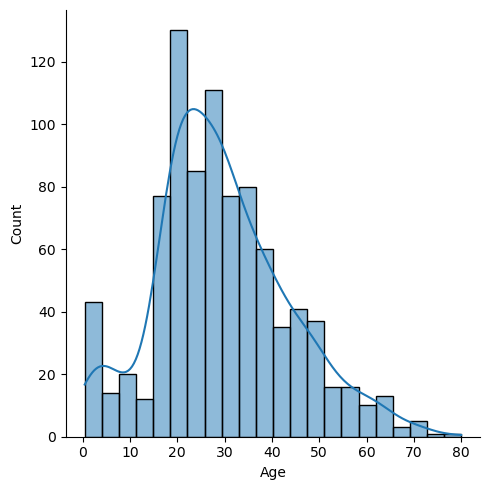

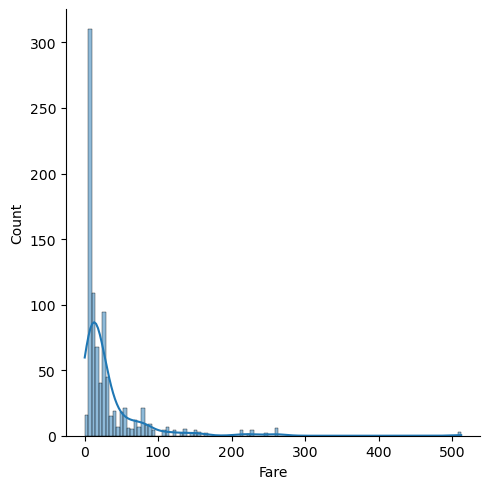

In [6]:
sns.displot(titanic["Age"], kde = True)
sns.displot(titanic["Fare"], kde = True)
plt.show()

Plotting the distributions of some variables can give helpful insight about normalizing data. As we can see here, fare and age are right skewed. We could make a choice to try to eliminate the skew with a transformation. This also gives us important validation information about the cleaning process (had we needed to do any). With a right skew like this, median replacement methods are a better choice than mean replacement.

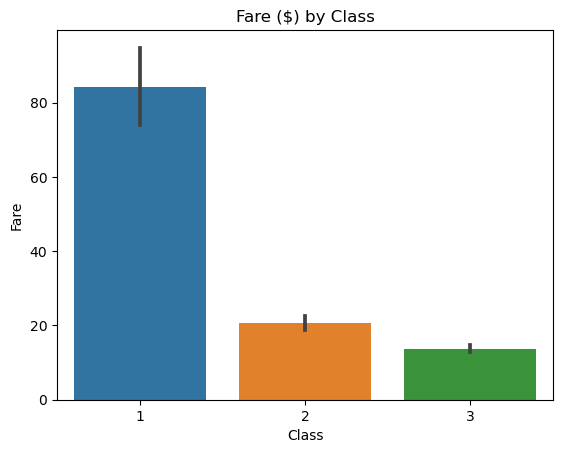

In [7]:
sns.barplot(data = titanic, x = "Pclass", y = "Fare")
plt.title("Fare ($) by Class")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.show()

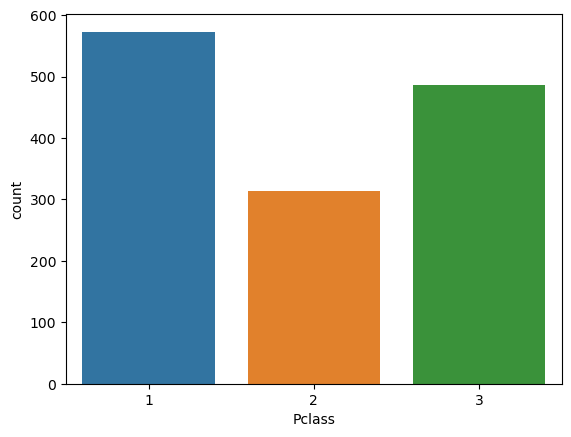

In [8]:
sns.countplot(data = titanic, x = "Sex")
sns.countplot(data = titanic, x = "Pclass")
plt.show()

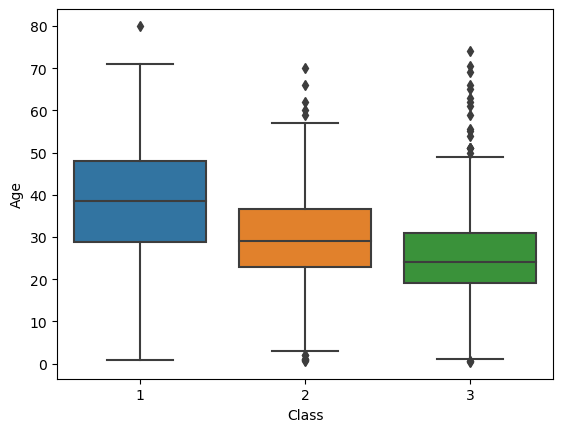

In [9]:
sns.boxplot(data = titanic, x = "Pclass", y = "Age")
plt.xlabel("Class")
plt.ylabel("Age")
plt.show()

Histograms and boxplots are helpful to see the behavior and distribution of the data. We could also make a choice to do further cleaning on the data based on the results of the boxplots. For example, we see many values outside the top whiskers of the 3rd class boxplot. From this, one could decide to omit or replace these values. From historical knowlege of how many 3rd class residents there were paired with the histogram that backs that information, I am going to make the call that these points are not, in fact, outliers, and are a valid distribution of the ages of 3rd class members on the titanic.

In [10]:
titanic['sex_encoded'] = titanic['Sex'].map({'male': 0, 'female': 1})
df_encoded = titanic.drop(columns = ["Sex"])
corr = df_encoded.corr()
df_encoded.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,sex_encoded
0,0,3,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,0


One last data cleaning method here. We are going to encode the 'Sex' variable into numerical data so our corrilation plots and further models can deal with that information.

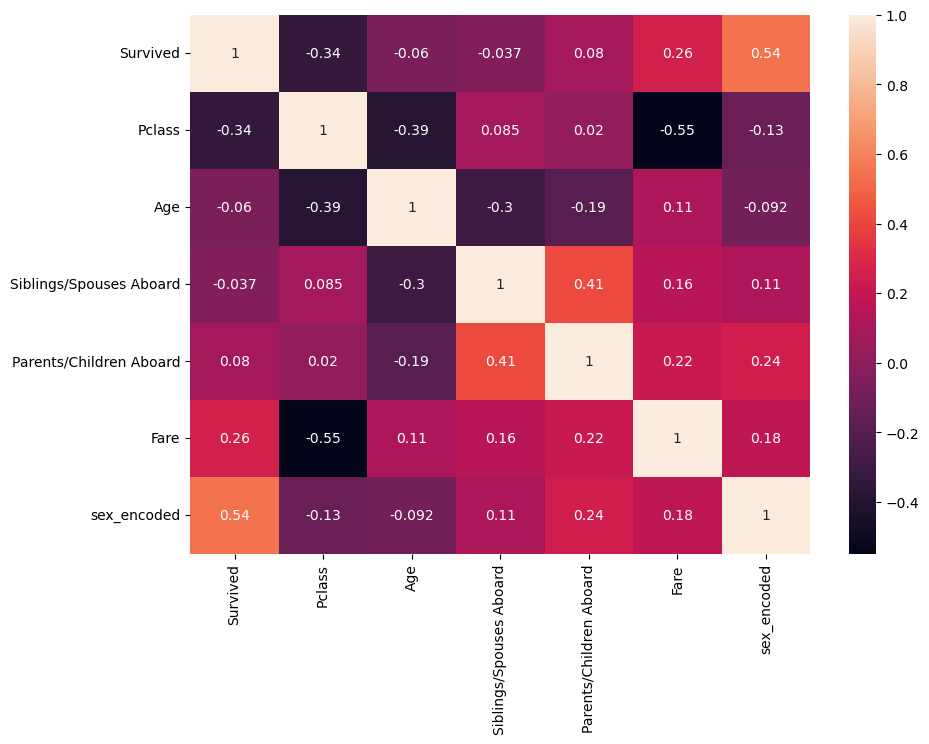

In [11]:
plt.figure(figsize= (10,7))
sns.heatmap(corr, annot = True)
plt.show()

Making a corrilation heatmap is a very handy EDA method that can tell us off the bat if there are any relationships we need to investigate. It can also warn us if there will be issues with collinearity. We note some relationships between sex, class, fare, and survival. There are also logical relationships between variables, like fare and class. We could play with the impacts of removing fare or class from the data frame and see how it changes our models later.

In [12]:
X, y = df_encoded.drop(columns = ["Survived"]), titanic["Survived"]
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

Split the data into features and labels and then standardize the features to make the model computation more efficient.

In [13]:
X_test, X_train, y_test, y_train = train_test_split(X_scaled, y, test_size = 0.2, random_state = 19)

Even though when we create our models we are going to be using **GridSearchCV** which has a cross validation feature built in, it is still best practice to separate a section of data to test generalization of the models.

## Creating Models

In [14]:
logit_mod = LogisticRegression()
xgb_mod = xgb_clf = XGBClassifier()
knn_mod = KNeighborsClassifier()
svm_mod = SVC()
tree_mod = DecisionTreeClassifier()
rf_mod = RandomForestClassifier()
nb_mod = BernoulliNB()

The models we are going to comopare and evaluate are logistic regression, gradient boost classifier, K-nearest neighbors classifier, support vector machine, decision trees, and random forest ensamble. We are loading them in the cell above and not running thought the functions themselves because we are going to be calling each model within **GridSearchCV**.
I should also note, for now we are going to be evalutating using accuracy as our scoring metric, but there will be futher investigation and discussion about why this might not be the way to build the most efficient model here.

In [15]:
logit_param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l2']}
xgb_param_grid = {'n_estimators': [2, 5, 10, 50, 100], 'max_depth': [2, 3, 5,7], 'learning_rate': [0.1, 0.01, 0.001]}
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 
                  'metric': ['euclidean', 'manhattan']}
svm_param_grid = {'C': [0.1, 1, 10, 100],                  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],    # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.001],# Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [2, 3, 4]}
tree_param_grid = {
    'criterion': ['gini', 'entropy'],      # Function to measure the quality of a split
    'max_depth': [None, 5, 10, 20],                    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2'],            # Number of features to consider for best split
    'ccp_alpha': [0.0, 0.01, 0.1]                      # Complexity parameter for Minimal Cost-Complexity Pruning
}
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False]}
rf_param_grid = {
    'n_estimators': [10,20,30],               # Number of trees in the forest
    'max_depth': [10, 20],               # Max depth of each tree
    'min_samples_split': [2, 5, 10],               # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2],                 # Minimum samples at a leaf node
    'criterion': ['entropy']   # Function to measure split quality
}

We specify a dictionary for each model so that the grid search can identify the best hyperparameters that maximize the accuracy.

In [16]:
logit_grid = GridSearchCV(estimator= logit_mod, param_grid = logit_param_grid, scoring = 'accuracy', cv = 10)
xgb_grid = GridSearchCV(estimator= xgb_mod, param_grid = xgb_param_grid, scoring = 'accuracy', cv = 10)
knn_grid = GridSearchCV(estimator= knn_mod, param_grid = knn_param_grid, scoring = 'accuracy', cv = 10)
svm_grid = GridSearchCV(estimator= svm_mod, param_grid = svm_param_grid, scoring = 'accuracy', cv = 10)
tree_grid = GridSearchCV(estimator= tree_mod, param_grid = tree_param_grid, scoring = 'accuracy', cv = 10)
nb_grid = GridSearchCV(estimator = nb_mod, param_grid = nb_param_grid, scoring = 'accuracy', cv = 10)
rf_grid = GridSearchCV(estimator= rf_mod, param_grid = rf_param_grid, scoring = 'accuracy', cv = 5)

Now we use the GridSearchCV tool to find the best hyperparameters for each model. If you look close, all other models use 10 fold cross validation, while the random forest was only 5. I did this purely due to the computing power of my personal machine. Though for production intent, computational cost is something to consider when construting models and code. Nevertheless, this could make the random forest model slightly less polished than the rest, but I believe that the effect will be negligible.

In [17]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

logit_model = logit_grid.fit(X_train, y_train)
xgb_model = xgb_grid.fit(X_train, y_train)
knn_model = knn_grid.fit(X_train, y_train)
svm_model = svm_grid.fit(X_train, y_train)
tree_model = tree_grid.fit(X_train, y_train)
nb_model = nb_grid.fit(X_train,y_train)
rf_model = rf_grid.fit(X_train, y_train)

Now for the fun part - fitting models to data. The warning at the beginning suppresses a future warning that a feature of a package in scikit learn is going to change, but this does not actually affect the model fit.

In [18]:
print('Logit Parameters:', logit_model.best_params_)
print('LXGBoost Parameters:', xgb_model.best_params_)
print('Knn Parameters:', knn_model.best_params_)
print('SVM Parameters:', svm_model.best_params_)
print('Tree Parameters:', tree_model.best_params_)
print('Naive Bayes Parameters:', nb_model.best_params_)
print('Forest Parameters:', rf_model.best_params_)

Logit Parameters: {'C': 10, 'penalty': 'l2'}
LXGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 5}
Knn Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
SVM Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Tree Parameters: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Naive Bayes Parameters: {'alpha': 1.0, 'fit_prior': True}
Forest Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


Above are the best parameters that were found for each respective model.

In [19]:
print('Logit score:', logit_model.best_score_.round(3))
print('LXGBoost score:', xgb_model.best_score_.round(3))
print('Knn score:', knn_model.best_score_.round(3))
print('SVM score:', svm_model.best_score_.round(3))
print('Tree score:', tree_model.best_score_.round(3))
print('Naive Bayes score:', nb_model.best_score_.round(3))
print('Forest score:', rf_model.best_score_.round(3))

Logit score: 0.787
LXGBoost score: 0.826
Knn score: 0.787
SVM score: 0.821
Tree score: 0.843
Naive Bayes score: 0.797
Forest score: 0.832


In [20]:
logit_y_pred = logit_model.best_estimator_.predict(X_test)
xgb_y_pred = xgb_model.best_estimator_.predict(X_test)
knn_y_pred = knn_model.best_estimator_.predict(X_test)
svm_y_pred = svm_model.best_estimator_.predict(X_test)
tree_y_pred = tree_model.best_estimator_.predict(X_test)
nb_y_pred = nb_model.best_estimator_.predict(X_test)
rf_y_pred = rf_model.best_estimator_.predict(X_test)


print('Logit test score:', accuracy_score(logit_y_pred,y_test).round(3))
print('XGBoost test score:', accuracy_score(xgb_y_pred,y_test).round(3))
print('Knn test score:', accuracy_score(knn_y_pred,y_test).round(3))
print('SVM test score:', accuracy_score(svm_y_pred,y_test).round(3))
print('Tree test score:', accuracy_score(tree_y_pred,y_test).round(3))
print('Naive Bayes test score:', accuracy_score(nb_y_pred,y_test).round(3))
print('Random Forest test score:', accuracy_score(rf_y_pred,y_test).round(3))

Logit test score: 0.787
XGBoost test score: 0.776
Knn test score: 0.763
SVM test score: 0.772
Tree test score: 0.78
Naive Bayes test score: 0.738
Random Forest test score: 0.763


## Initial discussion

From the results above, we are fully capable to select a model with best hyperparameters based on accuracy scores. We would say that based on training accuracy, the decision tree or the random forest performs the best. However, when we look at the test scores, all of the models perform relatively similarly with the random forest and the logistic regression having the highest test scores. This could be an indication that the decision tree is slightly overfit and does not generalize as well as the other models.

Before we make a final decision on the random forest, there are some things we should consider. FOr example, one of the assumptions of Naive Bayes is that the predictors are conditinally independent. We know from our correlation plot that some of these features are related (like fare and class for example). This could be having a negative effect on the accuracy of the Bayesian model. Treating each model as a plug and play is likely not the best practice, if the intent was to focus on a specific model type, we should properly prepare the data considering its weaknesses and strengths.

Another thing that could be causing model accuracy to be this low is the class imbalance in the data set. Though it is not extreme, the survivorship rate was about 38%, which does make it a minority class. Because of this, it might be better to evaluate the models by a different metric like the F1 score. This will yield better recall results because the F1 metric takes recall into consideration.


In [21]:
# ROC calculations
logit_y_prob = logit_model.predict_proba(X_test)[:,1]
logit_fpr, logit_tpr, _ = roc_curve(y_test, logit_y_prob)
logit_roc_auc = auc(logit_fpr, logit_tpr)

xgb_y_prob = xgb_model.predict_proba(X_test)[:,1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_y_prob)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

knn_y_prob = knn_model.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_prob)
knn_roc_auc = auc(knn_fpr, knn_tpr)

#svm_y_prob = svm_model.predict_proba(X_test)[:,1]
#svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_y_prob)
#svm_roc_auc = auc(svm_fpr, svm_tpr)

tree_y_prob = tree_model.predict_proba(X_test)[:,1]
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_y_prob)
tree_roc_auc = auc(tree_fpr, tree_tpr)

nb_y_prob = nb_model.predict_proba(X_test)[:,1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_prob)
nb_roc_auc = auc(nb_fpr, nb_tpr)

rf_y_prob = rf_model.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_prob)
rf_roc_auc = auc(rf_fpr, rf_tpr)

In [22]:
print('Logit F1 score:', f1_score(logit_y_pred,y_test).round(3))
print('XGBoost F1 score:', f1_score(xgb_y_pred,y_test).round(3))
print('Knn F1 score:', f1_score(knn_y_pred,y_test).round(3))
print('SVM F1 score:', f1_score(svm_y_pred,y_test).round(3))
print('Tree F1 score:', f1_score(tree_y_pred,y_test).round(3))
print('Naive F1 test score:', f1_score(nb_y_pred,y_test).round(3))
print('Random Forest F1 score:', f1_score(rf_y_pred,y_test).round(3))

Logit F1 score: 0.716
XGBoost F1 score: 0.615
Knn F1 score: 0.674
SVM F1 score: 0.637
Tree F1 score: 0.653
Naive F1 test score: 0.635
Random Forest F1 score: 0.66


In [23]:
print('Logit ROC AUC:', logit_roc_auc.round(3))
print('XGBoost ROC AUC:', xgb_roc_auc.round(3))
print('Knn ROC AUC:', knn_roc_auc.round(3))
#print('SVM ROC AUC:', svm_roc_auc.round(3))
print('Tree ROC AUC:', tree_roc_auc.round(3))
print('Naive Bayes ROC AUC:', nb_roc_auc.round(3))
print('Random Forest ROC AUC:', rf_roc_auc.round(3))

Logit ROC AUC: 0.843
XGBoost ROC AUC: 0.823
Knn ROC AUC: 0.814
Tree ROC AUC: 0.728
Naive Bayes ROC AUC: 0.807
Random Forest ROC AUC: 0.775


Based on the *F1 score* and the area under the *Receiver Operator Characteristic* curve (ROC AUC) we see a slightly different picture. This time with the logistic regression being the definitive victor. Although to be properly thorough we should really go through and recompute the best hyperparameters using the F1 score as the maximizing criteria and possibly adjust the dataset for the Baysian assumptions to hold up.
Instead, lets move on to a different method: directly addressing the class imbalance with oversampling method. 

In [47]:
from collections import Counter
from imblearn.combine import SMOTETomek

print("Class distribution before SMOTE:", Counter(y_train))

 
#Apply SMOTENC to oversample the minority class
smote_nc = SMOTETomek(sampling_strategy = 'auto')
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)
 
# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution before SMOTE: Counter({0: 115, 1: 63})
Class distribution after SMOTE: Counter({1: 100, 0: 100})


In [48]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

logit_model2 = logit_grid.fit(X_train_resampled,y_train_resampled)
xgb_model2 = xgb_grid.fit(X_train_resampled, y_train_resampled)
knn_model2 = knn_grid.fit(X_train_resampled, y_train_resampled)
svm_model2 = svm_grid.fit(X_train_resampled, y_train_resampled)
tree_model2 = tree_grid.fit(X_train_resampled, y_train_resampled)
nb_model2 = nb_grid.fit(X_train_resampled, y_train_resampled)
rf_model2 = rf_grid.fit(X_train_resampled, y_train_resampled)

In [49]:
print('Logit score:', logit_model2.best_score_.round(3))
print('LXGBoost score:', xgb_model2.best_score_.round(3))
print('Knn score:', knn_model2.best_score_.round(3))
print('SVM score:', svm_model2.best_score_.round(3))
print('Tree score:', tree_model2.best_score_.round(3))
print('Naive Bayes score:', nb_model2.best_score_.round(3))
print('Random Forest score:', rf_model2.best_score_.round(3))

Logit score: 0.82
LXGBoost score: 0.87
Knn score: 0.9
SVM score: 0.865
Tree score: 0.905
Naive Bayes score: 0.755
Random Forest score: 0.885


In [51]:
logit_y_pred2 = logit_model2.best_estimator_.predict(X_test)
xgb_y_pred2 = xgb_model2.best_estimator_.predict(X_test)
knn_y_pred2 = knn_model2.best_estimator_.predict(X_test)
svm_y_pred2 = svm_model2.best_estimator_.predict(X_test)
tree_y_pred2 = tree_model2.best_estimator_.predict(X_test)
nb_y_pred2 = nb_model2.best_estimator_.predict(X_test)
rf_y_pred2 = rf_model2.best_estimator_.predict(X_test)


print('Original Logit test score:', accuracy_score(logit_y_pred,y_test).round(3))
print('Original XGBoost test score:', accuracy_score(xgb_y_pred,y_test).round(3))
print('Original Knn test score:', accuracy_score(knn_y_pred,y_test).round(3))
print('Original SVM test score:', accuracy_score(svm_y_pred,y_test).round(3))
print('Original Tree test score:', accuracy_score(tree_y_pred,y_test).round(3))
print('Original Naive Bayes test score:', accuracy_score(nb_y_pred,y_test).round(3))
print('Original Random Forest test score:', accuracy_score(rf_y_pred,y_test).round(3))
print("\n")
print('Logit balanced test score:', accuracy_score(logit_y_pred2, y_test).round(3))
print('XGBoost balanced test score:', accuracy_score(xgb_y_pred2, y_test).round(3))
print('Knn balanced test score:', accuracy_score(knn_y_pred2, y_test).round(3))
print('SVM balanced test score:', accuracy_score(svm_y_pred2, y_test).round(3))
print('Tree balanced test score:', accuracy_score(tree_y_pred2, y_test).round(3))
print('Naive Bayes balanced test score:', accuracy_score(nb_y_pred2, y_test).round(3))
print('Random Forest balanced test score:', accuracy_score(rf_y_pred2, y_test).round(3))

Original Logit test score: 0.787
Original XGBoost test score: 0.776
Original Knn test score: 0.763
Original SVM test score: 0.772
Original Tree test score: 0.78
Original Naive Bayes test score: 0.738
Original Random Forest test score: 0.763


Logit balanced test score: 0.78
XGBoost balanced test score: 0.767
Knn balanced test score: 0.763
SVM balanced test score: 0.738
Tree balanced test score: 0.711
Naive Bayes balanced test score: 0.721
Random Forest balanced test score: 0.774


Here we see something pretty interesting. The test scores of the models that were trained on synthetically balanced datasets actually performed worse than the original. This could be a point where we decide to pivot and work on feature selection to improve model performace. We would do so by performing forwards/backwards selection with t-tests, using a information gain, or chi squared test. Given that our balancing methods did not improve the model, we are going to move on. The exception to the model changes being the logistic regression which performed nearly the same. This could be an indication that the logistic regression is the most robust model for this application. 

So, now we are going to take a peak under the hood and see what features have the greated impact on the model. This is an application that many companies will need to utilize in addition to having functioning models. This kind of information can be very help to drive buisness decisions.

In [55]:
best_model = logit_model.best_estimator_

In [65]:
coefficients = best_model.coef_[0]  
feature_names = X.columns 
odds_ratio = np.exp(coefficients)
prob = odds_ratio/(1 + odds_ratio)

coef_df = pd.DataFrame({ # Creating a data frame that has the coeffs, odds, and probabilites accociated with each feature
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratio,
    'Probability': prob
})
print(coef_df.sort_values(by='Odds Ratio', key=abs, ascending=False))

                   Feature  Coefficient  Odds Ratio  Probability
5              sex_encoded     1.182305    3.261883     0.765362
3  Parents/Children Aboard    -0.172105    0.841891     0.457080
2  Siblings/Spouses Aboard    -0.222290    0.800683     0.444655
4                     Fare    -0.316788    0.728485     0.421459
1                      Age    -0.497262    0.608194     0.378184
0                   Pclass    -1.266705    0.281758     0.219822


## Final Discussion and Results

We have explored many models and options here. We started off looking and some EDA to find relationships and interesting patterns to investigate. Inicially, it looked like sex had the greatest impact on survival based on the correlation plot. We then built up seven models tuning their hyper parameters using a gridsearch. While this was slighlty computationally expensive, it allowed us to explore the best options for each model and compare their respective best accuracy scores. At this point we determined that the best model was either between the random forest or the logistic regression. 

However, due to the linger issue of slight class imbalance, it was determined that the accuracy score might not be the best metric to evaluate the models. This continued into an investigation of F1 scores and ROC AUC comparision. We then saw that the logistic regression was a more favorable model.

Another way that we tried to tune the model was by using syntetic minority over-sampling technique for nominal and continuous values (SMOTE-NC) to try and address the class imbalance. This yeilded actually *worse* models than previously, with the exception of the logistic regression deviating only slightly. From this, I decided that the logistic regression was most likely the most robust model. 

Then, a datafrome was created to show feature importance. It was found that sex had the biggest impact: survival odds of women were roughly 3.26 (probability of 0.77). The next important features were, having children, siblings, or spouses aboard. There could be some circularity going on here in the way that siblings/spouses aboard could be feeding more information about sex and parents/children aboard could be feeding more information about age. 

